In [2]:
import scipy.io as sio
from numpy import * 
from matplotlib import pyplot as plt
import pandas as pd

# Lyapunov Exponential

In [3]:
def Distance(a1,a2):
    dist = sqrt(  (a1-a2)**2 )
    return dist

In [4]:
FILE =sio.loadmat("/Users/wangyuning/Desktop/Data-driven Methods in Engineering Mechanics/SM2001_Project/Data generator (Moehlis model)/moehlis_data_1000.mat")
DATA  = FILE["data"]
print(FILE.keys())
print(f"The shape of whole dataset is {DATA.shape}")

dict_keys(['__header__', '__version__', '__globals__', 'data'])
The shape of whole dataset is (1000, 4000, 9)


In [5]:
#Number of Timeseries
SERIES_NUM = DATA.shape[0]
# Timesteps
TIME = DATA.shape[1]
# ODE
ODE = DATA.shape[2]

In [6]:
a1 = DATA[100,:,:]
a2 = DATA[12,:,:]
print(f"Select two timeseries {a1.shape},{a2.shape}")

Select two timeseries (4000, 9),(4000, 9)


In [7]:
#The divergence w r t perturbation
sep1 = empty((TIME,ODE))
for i in range(ODE):
    sep1[:,i] =  Distance(a1[:,i], a1[:,i]*(1+exp(0.0296*(arange(4000)-500))*1e-6))
sep1 = mean(sep1,-1)
# The divergence without perturbation
sep2 = Distance(a1,a2)
sep2 = mean(sep2,-1)
# Concatenate them togather
sep3 = concatenate( [sep1[:1000],sep2[1000:]] )


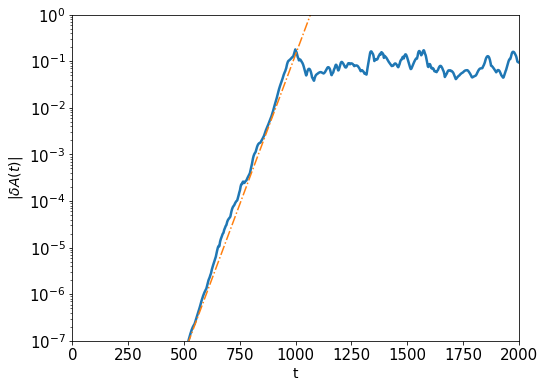

In [22]:
# Add pertub 
pertub = exp( 0.0296*(arange(4000)-600) )*1e-6 
plt.figure(figsize=(8,6))
plt.semilogy(sep3,lw=2.5)
plt.semilogy(pertub,"-.",lw=1.5)
plt.xlabel("t",fontdict={"size":14})
plt.ylabel(r"${|{\delta}A(t)|}$",fontdict={"size":14})
plt.ylim(1e-7,1)
plt.xlim(0,2000)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()